# **Endlesspeed Dummy Dataset Generator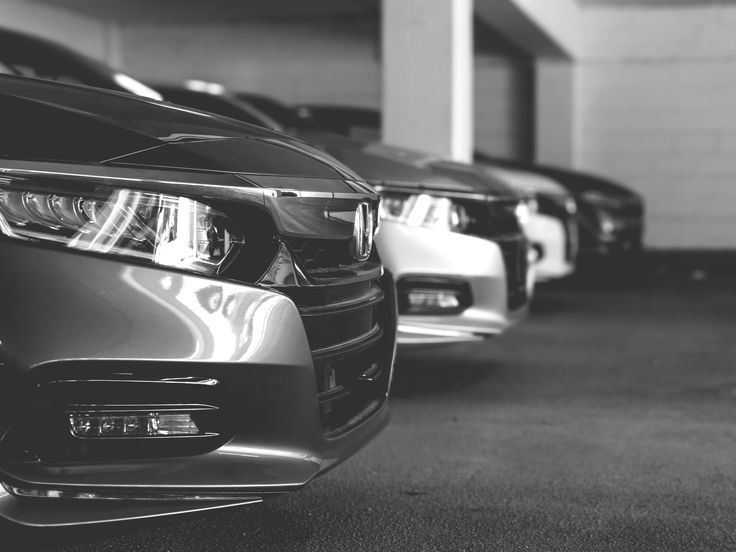**

Picture 1. Car Ilustration. Source: [https://unsplash.com/photos/grayscale-photo-of-car-on-road-JIcR3-O8ko8]

In [1]:
# Faker Library Installation
!pip install Faker
!pip install tabulate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.2 MB/s eta 0:00:00


In [2]:
# Import the library that will be used
from faker import Faker
from tabulate import tabulate
import random
from datetime import datetime, timedelta
import csv

In [8]:
# Define that the data used uses Indonesian format
FAKER = Faker('id_ID')

In [4]:
# Define that the data used uses American English format
# Use this only on advertisement table (specifically forfaker.providers.lorem)
FAKER = Faker('en_US')

In [9]:
def show_data(table):
    """
    Fungsi untuk menampilkan data

    arg:
        - table (dict) : data dictionary yang ingin ditampilkan

    return:
        None
    """

    tab = tabulate(tabular_data = table,
                   headers = table.keys(),
                   tablefmt = "psql",
                   numalign = "center")
    print(tab)

In [10]:
def csv_to_dict(filename):
    """
    Fungsi untuk ekstrak file csv menjadi list of dictionary

    arg:
        - filename (str) : nama file csv yang akan dibuka
    return:
        - data  (list) :  list of dictionary
    """

    # open csv file
    with open(f'{filename}', mode='r', encoding='utf-8-sig') as file:
        csv_reader = csv.DictReader(file)

        # save it in the form of a list of dictionaries
        data = {}
        for row in csv_reader:
            for key, value in row.items():
                # setdefault() to add key to result_dict
                # The value of the key is filled with an empty list first
                # empty list is filled with the append method per row of data
                data.setdefault(key, []).append(value)

    return data

## Create dummy data

### The dummy data created are the following tables:

* user
* product (partially)
* advertisement
* bid
* bid_status_log

### Dummy dataset for user table
* Description: This table stores information about registered users.
* Relation: city (as Child Table), product and bid (as Parent Table)

In [ ]:
# Extract the city.csv file into a list of dictionaries
city_table = csv_to_dict('city.csv')

In [ ]:
# Show city dataset
show_data(city_table)

In [ ]:
def generate_name(n_name):
    """
    Function to create dummy names

    args:
    - n_name (int): the number of name data you want to create

    returns:
    names (list): a list of names that have been created
    """

    names = list()

    while len(names) < n_name:

        first_name = FAKER.first_name()
        last_name = FAKER.last_name()

        full_name = (f'{first_name} {last_name}')
        if full_name not in names:
            names.append(full_name)

    return names

In [ ]:
def users_generator(n_user, is_print):
    """
    Function to create dummy dataset users table
    header:
        - user_id
        - city_id
        - username
        - first_name
        - last_name
        - e-mail
        - phone_number
        - address
        - location
        - is_verified

    args:
        - n_user (int) : The number of users you want to create
        - is_print (bool) : If True will display the data results

    return:
        - table  (list) :
    """

    # Create table
    table = {}
    table["user_id"] = [i+1 for i in range(n_user)]
    table['city_id'] = [random.choice(city_table['city_id']) for i in range(n_user)]
    names = generate_name(n_user)
    table['username'] = [f"{name.lower().replace(' ', '')}{Faker().random_int(min=10, max=99)}" \
                      for name in names]
    table['first_name'] = [i.split(' ')[0] for i in names]
    table['last_name'] = [i.split(' ')[1] for i in names]
    table['email'] = [f"{name.lower().replace(' ', '')}@{FAKER.free_email_domain()}" \
                      for name in names]
    table['phone_number'] = [FAKER.phone_number() for i in range(n_user)]
    table['address'] = [FAKER.street_address() for i in range(n_user)]
    lat_log = [FAKER.local_latlng(country_code = 'ID', coords_only = True) for i in range(n_user)]
    table["location"] = [(f'{lat_log[i][0]}, {lat_log[i][1]}')  for i in range(len(lat_log))]
    table["is_verified"] = random.choices([True, False], weights=(0.8, 0.2), k=n_user)


    # Print table
    if is_print:
        show_data(table)

    return table

In [ ]:
# Create dataset's users table
users_table = users_generator(100, True)

### Dummy dataset for product table
* Description: This table stores information about about the cars to be sold.
* Relation: users (as Child Table) and advertisement (as Parent Table)

Some fields on the table has been provided by Pacmann. However, it's worth noting that I also added more fields in the product table, which I generated with the Faker library as well.

In [ ]:
# Extract the car_pacmann_ver.csv file into a list of dictionaries
car_pacmann = csv_to_dict('car_pacmann_ver.csv')

In [ ]:
# Show car dataset from Pacmann
show_data(car_pacmann)

In [ ]:
def product_generator(n_product, car_pacmann, is_print):
    """
    Function to create dummy dataset product table
    header:
        - product_id
        - user_id
        - brand
        - model
        - colour
        - body_type
        - transmission
        - year
        - price
        - picture

    args:
        - n_product (int) : The number of products you want to create
        - users_table (list) : list of dictionary users data
        - car_pacmann (list) : list of dictionary car data from Pacmann
        - is_print (bool) : If True will display the data results

    return:
        - table  (list) :
    """

    # List of car colour
    car_colour = ['Black', 'White', 'Blue', 'Red']

    # List of car transmision
    car_transmission = ['Automatic', 'Manual']


    # Create table
    table = {}
    table["product_id"] = [i for i in car_pacmann["product_id"]]
    table["user_id"] = [random.randint(1, 20) for i in range(n_product)]
    table["brand"] = [i for i in car_pacmann["brand"]]
    table["model"] = [i for i in car_pacmann["model"]]
    table["colour"] = [random.choice(car_colour) for i in range(n_product)]
    table["body_type"] = [i for i in car_pacmann["body_type"]]
    table["transmission"] = [random.choice(car_transmission) for i in range(n_product)]
    table["year"] = [i for i in car_pacmann["year"]]
    table["price"] = [i for i in car_pacmann["price"]]
    table["picture"] = [FAKER.image_url() for i in range(n_product)]


    # Print table
    if is_print:
        show_data(table)

    return table

In [ ]:
# Create dataset's table product
product_table = product_generator(50, car_pacmann, True)

### Dummy dataset for advertisement table
* Description: This table stores information about product advertisements being offered and information on the availability of bidding prices.
* Relation: product (as Child Table)


In [ ]:
# Before execute this cell, change format to American English to avoid generated words be in pseudo-Latin
def advertisement_generator(n_ads, product_table, is_print):
    """
    Function to create dummy dataset advertisement table
    header:
        - advertisement_id
        - product_id
        - title
        - description
        - created_at
        - is_bid_allowed

    args:
        - n_ads (int) : The number of advertisement you want to create
        - product_table (list) : list of dictionary product data
        - is_print (bool) : If True will display the data results

    return:
        - table  (list) :
    """

    # Define start date
    start_date = datetime(2023, 6, 1)

    # Define end date
    end_date = datetime(2024, 4, 30, 23, 59, 59)

    # Create table
    table = {}
    table["advertisement_id"] = [i+1 for i in range(n_ads)]
    table["product_id"] = [i for i in product_table["product_id"]]
    table["title"] = [FAKER.text(max_nb_chars=20) for i in range(n_ads)]
    table["description"] = [FAKER.sentence(nb_words=10, variable_nb_words=True) for i in range(n_ads)]
    table["created_at"] = [FAKER.date_time_between(start_date, end_date) for i in range(n_ads)]
    table["is_bid_allowed"] = random.choices([True, False], weights=(0.9, 0.1), k=n_ads)


    # Print table
    if is_print:
        show_data(table)

    return table

In [ ]:
# Create dataset's advertisement table
advertisement_table = advertisement_generator(50, product_table, True)

### Dummy dataset for bid table
* Description: This table is used to store information about bids submitted for a product.
* Relation: bid_status_log (as Parent Table), user and advertisement (as Child Table)


In [ ]:
def bid_generator(n_bid, users_table, advertisement_table, is_print):
    """
    Function to create dummy dataset bid table
    header:
        - bid_id
        - user_id
        - advertisement_id
        - bid_price

    args:
        - n_bid (int) : The number of bid you want to create
        - users_table (list) : list of dictionary users data
        - advertisement_table (list) : list of dictionary advertisement data
        - is_print (bool) : If True will display the data results

    return:
        - table  (list) :
    """


    # Create table
    table = {}
    table["bid_id"] = [i+1 for i in range(n_bid)]
    table["user_id"] = [random.choice(users_table['user_id']) for i in range(n_bid)]
    table["advertisement_id"] = [random.choice(advertisement_table['advertisement_id']) for i in range(n_bid)]
    table['bid_price'] = [random.randint(80_000_000,120_000_000) for i in range(n_bid)]
    table['bid_price'] = [price - (price % 1_000_000) for price in table['bid_price']]


    # Print table
    if is_print:
        show_data(table)
    return table

In [ ]:
# Create dataset's bid table
bid_table = bid_generator(200, users_table, advertisement_table, True)

### Dummy dataset for bid_status_log table
* Description: This table stores information for each bid status change (sent, accepted, or rejected).
* Relation: bid (as Child Table)


In [ ]:
def generate_status(bid_table):
    """
    Function to create bid status
    For example:
    bid_id modulus 9 status_bid 'Sent' & 'Rejected'
    bid_id modulus 5 status_bid 'Sent' 'Accepted'
    the rest is 'Sent'

    args:
    - bid_table (list): list of dictionary bid data
    returns:
    list (list) : combination of bid_id and status
    """

    list_status = list()

    # Define start date
    start_date = datetime(2023, 6, 1)

    # Define end date
    end_date = datetime(2024, 4, 30, 23, 59, 59)

    for i in bid_table['bid_id']:
      if (i%9 == 0):
        for j in ['Sent', 'Rejected']:
          bid_id = i
          status = j
          start_date = start_date + timedelta(hours=int(i))
          end_date = end_date + timedelta(hours=int(i)+1)
          created_at = FAKER.date_time_between(start_date, end_date)
          data = (f'{bid_id} {status} {created_at}')
          list_status.append(data)
      elif (i%5 == 0):
        for j in ['Sent', 'Accepted']:
          bid_id = i
          start_date = start_date + timedelta(hours=int(i))
          end_date = end_date + timedelta(hours=int(i)+1)
          created_at = FAKER.date_time_between(start_date, end_date)
          data = (f'{bid_id} {status} {created_at}')
          list_status.append(data)
      else:
        for j in ['Sent']:
          bid_id = i
          status = j
          start_date = start_date + timedelta(hours=int(i))
          end_date = end_date + timedelta(hours=int(i)+1)
          created_at = FAKER.date_time_between(start_date, end_date)
          data = (f'{bid_id} {status} {created_at}')
          list_status.append(data)

    return list_status


In [ ]:
def generate_status(bid_table):
    """
    Function to create bid status
    For example:
    bid_id modulus 9 status_bid 'Sent' & 'Rejected'
    bid_id modulus 5 status_bid 'Sent' 'Accepted'
    the rest is 'Sent'

    args:
    - bid_table (list): list of dictionary bid data
    returns:
    list (list) : combination of bid_id and status
    """

    list_status = list()

    # Define start date
    start_date = datetime(2023, 6, 1)

    # Define end date
    end_date = datetime(2024, 4, 30, 23, 59, 59)

    for i in bid_table['bid_id']:
        if (i % 9 == 0):
            for j in ['Sent', 'Rejected']:
                bid_id = i
                status = j
                created_at = FAKER.date_time_between(start_date, end_date)
                data = f'{bid_id} {status} {created_at}'
                list_status.append(data)
        elif (i % 5 == 0):
            for j in ['Sent', 'Accepted']:
                bid_id = i
                status = j
                created_at = FAKER.date_time_between(start_date, end_date)
                data = f'{bid_id} {status} {created_at}'
                list_status.append(data)
        else:
            bid_id = i
            status = 'Sent'
            created_at = FAKER.date_time_between(start_date, end_date)
            data = f'{bid_id} {status} {created_at}'
            list_status.append(data)

    return list_status


In [ ]:
def generate_bid_status_log(bid_table, is_print):
    """
    Function to create dummy dataset bid_status_log table
    header:
        - bid_status_log
        - bid_id
        - bid_status
        - created_at

    args:
        - bid_table (list) : list of dictionary bid data
        - is_print (bool) : If True will display the data results

    return:
        - table  (list) :
    """

    # Create table
    table = {}
    list_status = generate_status(bid_table)
    table["bid_status_log_id"] = [i+1 for i in range(len(list_status))]
    table["bid_id"] = [i.split(' ')[0] for i in list_status]
    table["bid_status_id"] = [i.split(' ')[1] for i in list_status]
    table['created_at'] = [f"{i.split(' ')[2]} {i.split(' ')[3]}" for i in list_status]

    # Print table
    if is_print:
        show_data(table)
    return table


In [ ]:
# Create dataset's bid_status_log table
bid_status_log_table = generate_bid_status_log(bid_table, True)

In [ ]:
# Create dataset's bid_log_status table
bid_log_status_table = bid_generator(200, users_table, advertisement_table, True)

## Simpan menjadi file csv

In [ ]:
def save_to_csv(data, nama_file):
    '''
    Function to save dummy data to CSV

    args:
      - data (list): list of dictionary data that will be converted into CSV
      - file_name (str) : name for the csv file

    returns:
      - None
    '''

    # Create file csv
    with open(file = f"{nama_file}.csv", mode = 'w', newline = '') as csv_file:
        # Create writer csv
        writer = csv.writer(csv_file)

        # Create header csv
        writer.writerow(list(data.keys()))

        # Know the length of the data
        len_data = len(list(data.items())[0][1])

        # write data to file csv
        for i in range(len_data):
            row = []
            for key in data.keys():
                row.append(data[key][i])
            writer.writerow(row)

In [ ]:
# menyimpan data users dalam bentuk csv
save_to_csv(data = users_table,
            nama_file='users')

In [ ]:
# menyimpan data product dalam bentuk csv
save_to_csv(data = product_table,
            nama_file='product')

In [ ]:
# menyimpan data advertisement dalam bentuk csv
save_to_csv(data = advertisement_table,
            nama_file='advertisement')

In [ ]:
# menyimpan data bid dalam bentuk csv
save_to_csv(data = bid_table,
            nama_file='bid')

In [ ]:
# menyimpan data bid_status_log dalam bentuk csv
save_to_csv(data = bid_status_log_table,
            nama_file='bid_status_log')